Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading the dataset containing Apple stock price data into a suitable data structure (e.g., DataFrame) and then exploring it to understand its structure, summary statistics, and identify any missing values.

In [2]:
df = pd.read_csv('apple_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...,...,...
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
5,2014-01-09,19.528570,19.530714,19.119642,19.161428,16.798664,279148800
6,2014-01-10,19.279642,19.314285,18.968214,19.033571,16.686569,304976000
7,2014-01-13,18.925358,19.375000,18.924286,19.133215,16.773926,378492800
8,2014-01-14,19.222143,19.526072,19.202143,19.513929,17.107697,332561600
9,2014-01-15,19.768572,20.007143,19.702143,19.905714,17.451174,391638800


In [4]:
df.shape

(2475, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Data Preprocessing:**

Handle any missing values in the dataset.

Convert date columns to a datetime format for time-based analysis.

Set the date column as the index for time series analysis.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2475 non-null   datetime64[ns]
 1   Open       2475 non-null   float64       
 2   High       2475 non-null   float64       
 3   Low        2475 non-null   float64       
 4   Close      2475 non-null   float64       
 5   Adj Close  2475 non-null   float64       
 6   Volume     2475 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.5 KB


**Data Visualization:**

Plot the closing prices over time to visualize the trend and identify any patterns or outliers.

In [10]:
# Create an interactive time series plot using Plotly Express
fig = px.line(df, x='Date', y='Close', title='Apple Stock Closing Prices Over Time',
              labels={'Close': 'Closing Price', 'Date': 'Date'})

# Show the plot
fig.show()

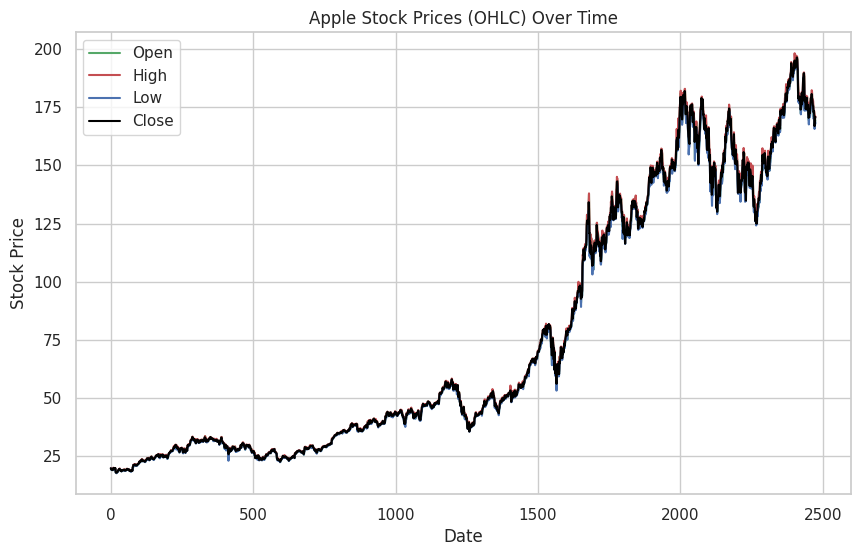

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=df.index, y=df['Open'], label='Open', color='g')
sns.lineplot(x=df.index, y=df['High'], label='High', color='r')
sns.lineplot(x=df.index, y=df['Low'], label='Low', color='b')
sns.lineplot(x=df.index, y=df['Close'], label='Close', color='black')
plt.title('Apple Stock Prices (OHLC) Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
# Assuming 'df' is your DataFrame with the Date as the index
fig = px.bar(df, x=df.index, y='Volume', title='Apple Stock Volume Over Time',
             labels={'Volume': 'Volume', 'Date': 'Date'})

# Show the plot
fig.show()

**Results and Evaluation:**

Evaluate the forecasting model's performance using metrics like Mean Squared Error (MSE) on the testing set.
Visualize the predicted values against the actual values to assess the model's accuracy.

Mean Squared Error: 444.8746849860024


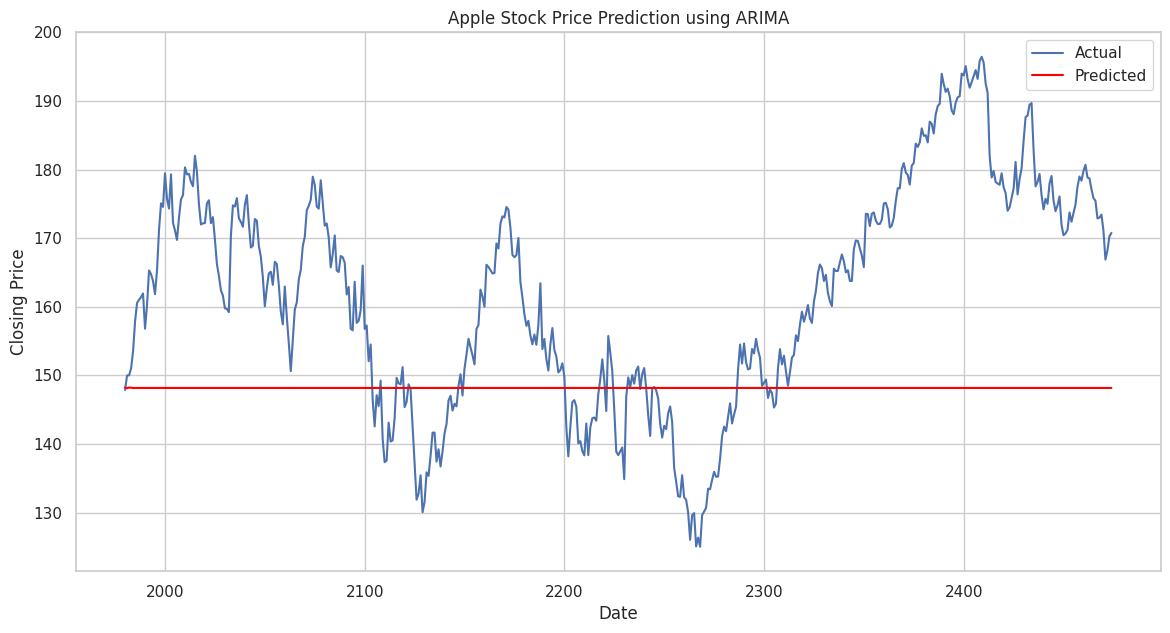

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with Date as the index and 'Close' as the target variable
# Make sure 'df' is in the appropriate format (time series data, sorted by date)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))  # You may need to tune these parameters
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['Close'], forecast)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Iterate and Fine-Tune:**

If necessary, iterate on the model and experiment with different features or hyperparameters to improve accuracy.

In [14]:
from itertools import product

# Hyperparameter tuning for ARIMA
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_mse = float('inf')
best_order = None

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    model = ARIMA(train['Close'], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test['Close'], forecast)

    if mse < best_mse:
        best_mse = mse
        best_order = order

print(f'Best ARIMA Order: {best_order}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/s

Best ARIMA Order: (0, 1, 1)


**Final Visualization:**

Once satisfied with the model's performance, create a final visualization showcasing the actual vs. predicted stock prices.

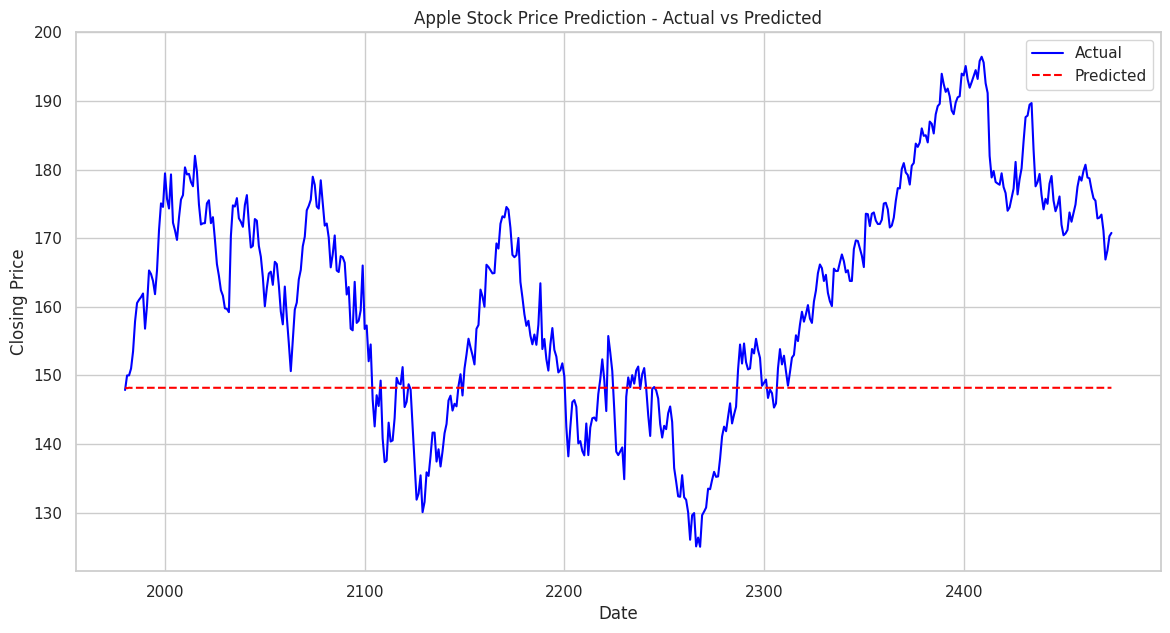

In [15]:
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Predicted', color='red', linestyle='dashed')
plt.title('Apple Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()